In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


Our housing data has the following categories:
Lot Area (in sq.ft.)  

Overall Quality (from 1-10)

Overall Condition (from 1-10)

Total Basement Area (in sq.ft.)

\# of Full Bathrooms

\# of Half Bathrooms

\# of Bedrooms above ground

Total \# of Rooms above ground

\# of Fireplaces

Garage Area (in sq.ft.)

Lastly we have the prediction category- Above Median Price, 0 = no, 1 = yes

In [4]:
dataset = df.values

We will convert our data into arrays to process. Here is how the data looks now...

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

The first 10 columns of our dataset will go into X and our last column, the prediction variable will go into Y

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

We now have to do some normalization so values with HUGE numbers don't outweigh smaller values. It would not make sense for 3 bathrooms (you'll never have to wait to use the toilet just because somebody is getting ready in the morning!) to have far less input in the model than a tiny 100 sq.ft. garage.
Values will be scaled between 0 and 1

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Now, we can split our dataset into a training set, validation set, and test set. 30% of the data will be split into validation and test. Then 50% of that split will be split again. (sklearn 'train_test_split' only splits into two categories and we have three to make)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


We now have six variables for datasets: 



*   X_train (10 input features, 70% of full dataset)
*   X_val (10 input features, 15% of full dataset)
*   X_test (10 input features, 15% of full dataset)
*   Y_train (1 label, 15% of full dataset)
*   Y_val (1 label, 15% of full dataset)
*   Y_test (1 label, 15% of full dataset)

It's time to build and train our neural network


In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import MeanSquaredError
import tensorflow as tf

The model has 4 layers:
Input layer with 10 inputs, 2 hidden layers with 32 neurons each, and an output layer with 1 output.

In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])



```
model = Sequential([...])
```
Our model, aptly stored in a variable called 'model' will be described layer by layer, "sequentially".
```
Dense(32, activation='relu', input_shape=(10,)),
```
Our first dense layer of 32 neurons uses ReLU activation and has input shape of 10 since there are 10 input features. Dense layers are fully connected layers.
```
Dense(32, activation='relu'),
```
Our second dense layer matches the first. Keras infers the shape from the previous layer's output.
```
Dense(1, activation='sigmoid'),
```
Our third layer is a dense layer with 1 neuron and sigmoid activation.

Now that the architecture is configured, we have to tell the model:

* Which algorithm to optimize with
* Which loss function to use
* What other metrics it should track besides loss

In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.MeanSquaredError()])

```
optimizer='sgd'
```
Stochastic gradient descent (sgd) optimizes the function 
```
loss='binary_crossentropy'
```
Binary cross entropy is used to measure loss when classifying two categories
```
metrics=['accuracy']
```
Accuracy will also be tracked

We can train the model!

We use the training data to fit the parameters to. The validation data shows us how well the model is training. Saving this in a variable 'hist' will help us visualize the training.

In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 13ms/step - loss: 0.7109 - mean_squared_error: 0.2587 - val_loss: 0.7153 - val_mean_squared_error: 0.2610
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7025 - mean_squared_error: 0.2547 - val_loss: 0.7020 - val_mean_squared_error: 0.2544
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6952 - mean_squared_error: 0.2510 - val_loss: 0.6930 - val_mean_squared_error: 0.2499
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6879 - mean_squared_error: 0.2474 - val_loss: 0.6860 - val_mean_squared_error: 0.2464
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6822 - mean_squared_error: 0.2445 - val_loss: 0.6802 - val_mean_squared_error: 0.2435
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6798 - mean_squared_error: 0.2433 - val_loss: 0.6751 - val_mean_squared_error: 0.2410
Epoch 7/100
32/32 [==============

In [19]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2833 - mean_squared_error: 0.0887


0.08867383748292923

In [20]:
import matplotlib.pyplot as plt

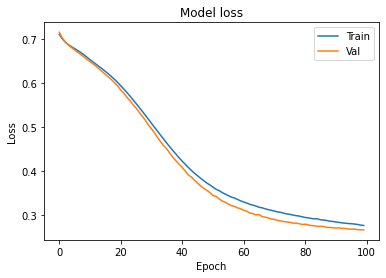

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

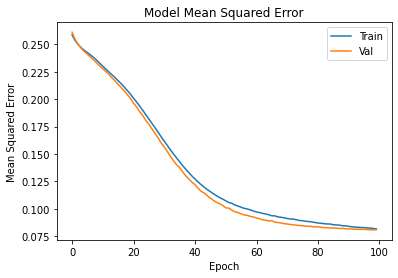

In [22]:
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

For the sake of practicing regularization, model 2 willbadly overfit the training set.

In [23]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [24]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.MeanSquaredError()])

In [25]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.5551 - mean_squared_error: 0.1829 - val_loss: 0.3191 - val_mean_squared_error: 0.0977
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3701 - mean_squared_error: 0.1128 - val_loss: 0.2912 - val_mean_squared_error: 0.0926
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3695 - mean_squared_error: 0.1119 - val_loss: 0.2916 - val_mean_squared_error: 0.0919
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2908 - mean_squared_error: 0.0879 - val_loss: 0.2838 - val_mean_squared_error: 0.0842
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2558 - mean_squared_error: 0.0748 - val_loss: 0.2473 - val_mean_squared_error: 0.0783
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2259 - mean_squared_error: 0.0648 - val_loss: 0.2592 - val_mean_squared_error: 0.0843
Epoch 7/100
32/32 [===============

We can see, in the following graph, training loss is decreasing but validation is far above training loss and increasing.

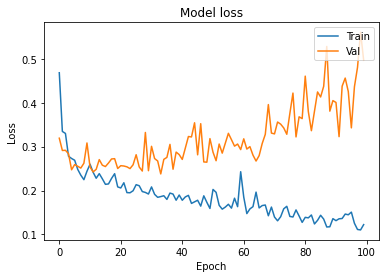

In [26]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We see mean squared error also diverge similarly. These are key signs of a model overfitting. It is effectively 'memorizing' the training dataset and is unable to generalize well and predict new data accurately.

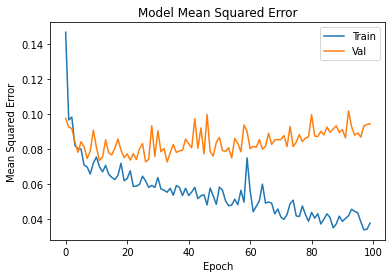

In [27]:
plt.plot(hist_2.history['mean_squared_error'])
plt.plot(hist_2.history['val_mean_squared_error'])
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Dropout and L2 regularization can help solve this issue.

In [28]:
from keras.layers import Dropout
from keras import regularizers

Model 3 adds L2 regularization to include the squared values of parameters in our overall loss function, weighing them by 0.01 in the loss function. Additionally, Dropout is used to introduce a 30% probability that the neurons in the previous layer will drop out during training.

In [29]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [30]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.MeanSquaredError()])

Running model 3 will show us the results of these modifications.

In [31]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 21.1244 - mean_squared_error: 0.2421 - val_loss: 3.8619 - val_mean_squared_error: 0.1715
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 2.4861 - mean_squared_error: 0.1562 - val_loss: 0.6210 - val_mean_squared_error: 0.0893
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6297 - mean_squared_error: 0.1174 - val_loss: 0.4814 - val_mean_squared_error: 0.0875
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5366 - mean_squared_error: 0.1074 - val_loss: 0.4606 - val_mean_squared_error: 0.0847
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4999 - mean_squared_error: 0.0953 - val_loss: 0.4670 - val_mean_squared_error: 0.0864
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4829 - mean_squared_error: 0.0916 - val_loss: 0.4504 - val_mean_squared_error: 0.0847
Epoch 7/100
32/32 [=============

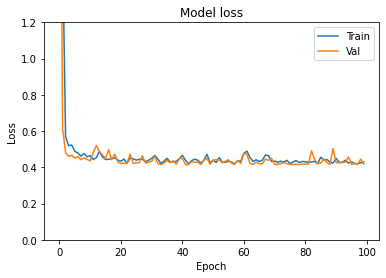

In [32]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

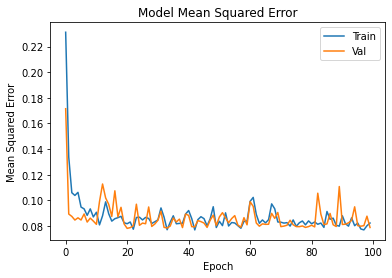

In [33]:
plt.plot(hist_3.history['mean_squared_error'])
plt.plot(hist_3.history['val_mean_squared_error'])
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Now we see validation loss stay low with training loss and a similar story for training and validation mean squared error. 